In [1]:
import pandas as pd
import osmnx as ox, planarity, warnings
ox.config(use_cache=True)

In [2]:
walk = pd.read_csv('data/results_walk.csv')
drive = pd.read_csv('data/results_drive.csv')

In [3]:
walk.columns

Index(['country', 'city', 'distance', 'network_type',
       'count_cleaned_intersections', 'count_nonplanar_intersections',
       'count_planar_intersections', 'edge_length_ratio', 'geometry',
       'is_planar', 'mean_edge_length', 'mean_planar_segment_length', 'nodes',
       'overcount_nonplanar_cleaned', 'overcount_planar_cleaned',
       'overcount_planar_nonplanar', 'phi', 'runtime'],
      dtype='object')

In [4]:
print(drive['is_planar'].sum() / len(walk))
print(drive['phi'].mean())
print(drive['phi'].min())
print(drive['phi'].max())
print(drive['edge_length_ratio'].mean())
print(drive['edge_length_ratio'].min())
print(drive['edge_length_ratio'].max())
print((drive['phi']==1).sum())
print((drive['edge_length_ratio']==1).sum())

0.2
0.8853000000000002
0.574
1.0
0.8996599999999999
0.635
1.0
7
7


In [5]:
print(walk['is_planar'].sum() / len(walk))
print(walk['phi'].mean())
print(walk['phi'].min())
print(walk['phi'].max())
print(walk['edge_length_ratio'].mean())
print(walk['edge_length_ratio'].min())
print(walk['edge_length_ratio'].max())
print((walk['phi']==1).sum())
print((walk['edge_length_ratio']==1).sum())

0.1
0.92018
0.67
1.0
0.91534
0.659
1.0
2
2


In [6]:
drive.sort_values('phi', ascending=True)

,country,city,distance,network_type,count_cleaned_intersections,count_nonplanar_intersections,count_planar_intersections,edge_length_ratio,geometry,is_planar,mean_edge_length,mean_planar_segment_length,nodes,overcount_nonplanar_cleaned,overcount_planar_cleaned,overcount_planar_nonplanar,phi,runtime
27,Russia,Moscow,805,drive,59,70,122,0.680,POINT (37.537873 55.749165),False,246.170,167.467,110,1.186,2.068,1.743,0.574,2.02
42,USA,Los Angeles,805,drive,162,180,309,0.635,POINT (-118.249837 34.056394),False,160.775,102.159,251,1.111,1.907,1.717,0.583,8.10
41,USA,Dallas,805,drive,228,299,500,0.650,POINT (-96.805628 32.777714),False,135.710,88.197,378,1.311,2.193,1.672,0.598,16.28
43,USA,Miami,805,drive,185,220,340,0.662,POINT (-80.19443199999999 25.7725),False,124.681,82.503,283,1.189,1.838,1.545,0.647,8.52
7,China,Shanghai,805,drive,109,176,258,0.717,POINT (121.503787 31.236286),False,161.564,115.896,215,1.615,2.367,1.466,0.682,5.28
35,UAE,Dubai,805,drive,152,198,289,0.722,POINT (55.274985 25.202671),False,165.494,119.522,243,1.303,1.901,1.460,0.685,5.93
40,USA,Cincinnati,805,drive,213,243,333,0.757,POINT (-84.514753 39.101593),False,134.080,101.477,313,1.141,1.563,1.370,0.730,11.07
47,USA,Seattle,805,drive,258,270,369,0.779,POINT (-122.33445 47.61117),False,113.763,88.615,350,1.047,1.430,1.367,0.732,16.53
38,USA,Atlanta,805,drive,190,198,269,0.777,POINT (-84.386107 33.756297),False,130.952,101.793,255,1.042,1.416,1.359,0.736,8.30
1,Australia,Sydney,805,drive,151,177,239,0.749,POINT (151.208977 -33.863616),False,150.771,112.902,223,1.172,1.583,1.350,0.741,5.60


In [7]:
drive[drive['is_planar'] == True].sort_values('phi')[['city', 'phi', 'edge_length_ratio']]

,city,phi,edge_length_ratio
3,Toronto,0.930,0.958
15,Jakarta,0.983,0.986
9,Copenhagen,0.992,0.988
0,Buenos Aires,1.000,1.000
14,Delhi,1.000,1.000
17,Bologna,1.000,1.000
18,Florence,1.000,1.000
19,Milan,1.000,1.000
29,Mogadishu,1.000,1.000
31,Barcelona,1.000,1.000


In [8]:
walk[walk['is_planar'] == True].sort_values('phi')[['city', 'phi', 'edge_length_ratio']]

,city,phi,edge_length_ratio
41,Dallas,0.963,0.959
14,Delhi,0.993,0.992
17,Bologna,0.996,0.996
29,Mogadishu,1.000,1.000
49,Caracas,1.000,1.000


In [9]:
drive['drive_walk_phi'] = (walk['phi'] / drive['phi'])
drive[['city', 'drive_walk_phi']].sort_values('drive_walk_phi')

,city,drive_walk_phi
32,Geneva,0.840609
19,Milan,0.875000
37,London,0.883555
31,Barcelona,0.904000
3,Toronto,0.922581
12,Paris,0.931174
0,Buenos Aires,0.946000
26,Manila,0.957717
11,Lyon,0.968718
23,Mexico City,0.971277


In [10]:
print(drive['overcount_planar_nonplanar'].mean())
print(1 - drive['edge_length_ratio'].mean())
print(walk['overcount_planar_nonplanar'].mean())
print(1 - walk['edge_length_ratio'].mean())

1.15688
0.1003400000000001
1.09402
0.08465999999999996


g:\geoff\dropbox\documents\school\phd\projects\code\osmnx-repos\osmnx\osmnx\core.py:112: ResourceWarning: unclosed file <_io.TextIOWrapper name='cache/82ad5dacee93a90fdd04a1166cd91daa.json' mode='r' encoding='utf-8'>
  response_json = json.load(io.open(cache_path_filename, encoding='utf-8'))


True


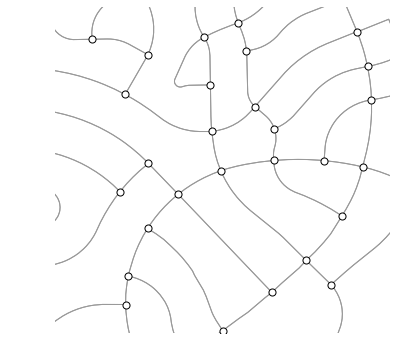

In [34]:
pt = (38.586683, -121.375365)
dist = 500

G = ox.graph_from_point(pt, network_type='drive', distance=dist*2, truncate_by_edge=True)
G = ox.project_graph(G)

warnings.filterwarnings(action='ignore')
print(planarity.is_planar(G))
warnings.filterwarnings(action='default')

bbox = ox.bbox_from_point(pt, dist, project_utm=True)
fig, ax = ox.plot_graph(G, bbox=bbox, fig_height=6, fig_width=6, 
                        node_size=50, node_zorder=2, node_color='w', node_edgecolor='k',
                        save=True, filename='planar')

g:\geoff\dropbox\documents\school\phd\projects\code\osmnx-repos\osmnx\osmnx\core.py:112: ResourceWarning: unclosed file <_io.TextIOWrapper name='cache/0ce624d274cd61e13f9af7353b00fb98.json' mode='r' encoding='utf-8'>
  response_json = json.load(io.open(cache_path_filename, encoding='utf-8'))


False


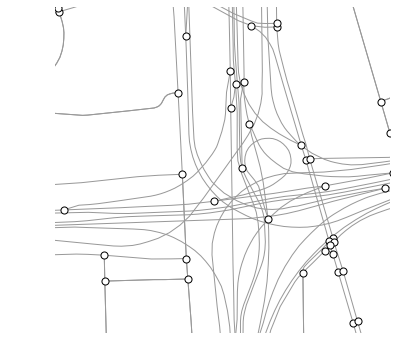

In [35]:
pt = (32.909035, -96.898432)
G = ox.graph_from_point(pt, network_type='drive', distance=dist*2, truncate_by_edge=True)
G = ox.project_graph(G)

warnings.filterwarnings(action='ignore')
print(planarity.is_planar(G))
warnings.filterwarnings(action='default')

bbox = ox.bbox_from_point(pt, dist, project_utm=True)
fig, ax = ox.plot_graph(G, bbox=bbox, fig_height=6, fig_width=6, 
                        node_size=50, node_zorder=2, node_color='w', node_edgecolor='k',
                        save=True, filename='nonplanar')